In [1]:
# sarcasm.json
# !gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: C:\Users\benja\Documents\Development\Python\Tensorflow Developer\Natural Language Processing\Week 1 -  Sentiment in Text\sarcasm.json

  0%|          | 0.00/5.64M [00:00<?, ?B/s]
  9%|9         | 524k/5.64M [00:00<00:09, 566kB/s]
 19%|#8        | 1.05M/5.64M [00:01<00:04, 1.09MB/s]
 37%|###7      | 2.10M/5.64M [00:01<00:01, 2.27MB/s]
 65%|######5   | 3.67M/5.64M [00:01<00:00, 4.21MB/s]
 84%|########3 | 4.72M/5.64M [00:01<00:00, 5.30MB/s]
100%|##########| 5.64M/5.64M [00:01<00:00, 3.56MB/s]


In [1]:
import json

import numpy as np

with open("sarcasm.json", "r") as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])

In [2]:
print(sentences[:3])
print(labels[:3])

["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild"]
[0, 0, 1]


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding="post")

print(padded[:2])
print(padded.shape)

[[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    4  8435  3338  2746    22     2   166  8436   416  3112     6   258
      9  1002     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]]
(26709, 40)


In [11]:
# neural net
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(len(padded[0]), input_shape=padded[0].shape),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               5248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.33, random_state=42)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_test, y_test),
    validation_steps=30,
    batch_size=32
)

Epoch 1/100
559/559 [==============================] - 2s 2ms/step - loss: 87.8108 - accuracy: 0.5030 - val_loss: 20.2428 - val_accuracy: 0.5281
Epoch 2/100
559/559 [==============================] - 1s 2ms/step - loss: 35.1802 - accuracy: 0.5195 - val_loss: 10.9008 - val_accuracy: 0.5312
Epoch 3/100
559/559 [==============================] - 1s 2ms/step - loss: 20.2163 - accuracy: 0.5143 - val_loss: 6.3369 - val_accuracy: 0.5042
Epoch 4/100
559/559 [==============================] - 1s 2ms/step - loss: 12.2287 - accuracy: 0.5093 - val_loss: 4.3622 - val_accuracy: 0.5208
Epoch 5/100
559/559 [==============================] - 1s 2ms/step - loss: 7.8909 - accuracy: 0.5093 - val_loss: 2.6110 - val_accuracy: 0.5104
Epoch 6/100
559/559 [==============================] - 1s 2ms/step - loss: 4.8008 - accuracy: 0.5051 - val_loss: 1.7617 - val_accuracy: 0.4844
Epoch 7/100
559/559 [==============================] - 1s 2ms/step - loss: 3.0103 - accuracy: 0.5122 - val_loss: 1.0609 - val_accuracy: 

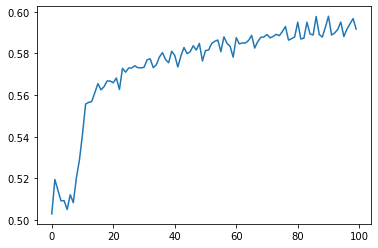

In [14]:
acc = history.history["accuracy"]

epochs = range(len(acc))

import matplotlib.pyplot as plt

plt.plot(epochs, acc)